(97, 2)


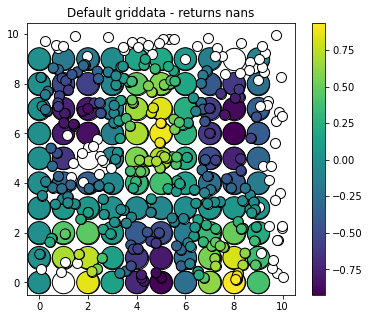

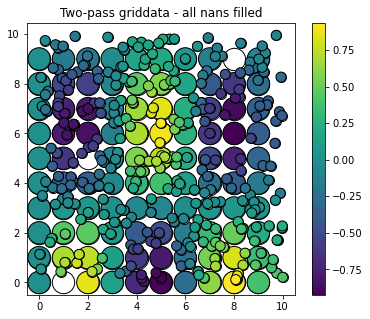

In [11]:
# testing griddata methods
from scipy import interpolate
import numpy as np
import slabMesh
import matplotlib.pyplot as plt

# input points
x=np.arange(10)
[xin,yin]=np.meshgrid(x,x)
zin=np.sin(xin)*np.cos(yin/2) # star operator turns a tuple into individual arguments
# add some nans to mess up the interpolation
zin[5,2]=np.nan
zin[-1,-2]=np.nan
zin[0,1]=np.nan

#output points
xout=np.random.rand(300)*10
yout=np.random.rand(300)*10

# do the interpolation:
# griddata - results in too many nans if data are missing,
# or if target points areoutside the edges of the convex hull
points=np.column_stack((xin.ravel(), yin.ravel()))
zout = interpolate.griddata(points, zin.ravel(), (xout,yout))

# modified griddata: remove input nans first, then 
# use nearest-neighbor interpolation for any remaining output nans
zout2=slabMesh.my_griddata(xin,yin,zin,xout,yout)

plt.figure(figsize=(6,5))

plt.scatter(xin,yin,500,'w',edgecolors='k')
plt.scatter(xin,yin,500,zin,edgecolors='k')

plt.scatter(xout,yout,100,'w',edgecolors='k')
plt.scatter(xout,yout,100,zout,edgecolors='k')
plt.title('Default griddata - returns nans')
plt.colorbar()

plt.figure(figsize=(6,5))

plt.scatter(xin,yin,500,'w',edgecolors='k')
plt.scatter(xin,yin,500,zin,edgecolors='k')

plt.scatter(xout,yout,100,'w',edgecolors='k')
plt.scatter(xout,yout,100,zout2,edgecolors='k')
plt.title('Two-pass griddata - all nans filled')
plt.colorbar()
plt.show()